# Content for the Credit Card Fraud Project

## 1. Setup
##### 1.1 Support the following project to run in both python 2 and python 3
##### 1.2 Import the packages needed in the project
##### 1.3 Read the data in txt file into csv file

## 2. EDA
##### 2.1 Basic info
##### 2.2 Seperate the dataset into numerical, categorical and bool data (for later processing)
##### 2.3 Graphs plotting

## 3. Prepare the data for Machine Learning Algorithms
##### 3.1 Numerical features processing
##### 3.2 Numerical features engineering 
##### 3.3 Categorical features processing and engineering

## 4. Model Development 
##### 4.1 Undersampling with logestic regression
##### 4.2 Oversampling with logestic regression
##### 4.3 Undersampling with randomforest
##### 4.4 Oversampling with randomforest

## 5. Conclusion


# 1. Setup

### 1.1 Support the following project to run in both python 2 and python 3

In [49]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

##install packages
!pip install missingno
!pip install optuna
!pip install lazypredict==0.2.7

In [50]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### 1.2 Import the packages needed in the project

In [217]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE


from imblearn.over_sampling import SMOTE


# machine learning models
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

# accuracy metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

### 1.3 read the data in txt file into csv file

In [52]:
#use jason 
import json
import csv

def json_to_csv(txt_file, csv_file):

    lista = []
    with open(txt_file, 'r') as in_file:
        lines = in_file.readlines()
        for line in lines:
            try:
                dict_line = json.loads(line)
                lista.append(dict_line)
            except Exception as err:
                print(err)
##interesting way to get all the header: just leave the header list blank, then copy all the headers from the error 
#message
    header = ['acqCountry', 'enteredCVV', 'currentBalance', 'expirationDateKeyInMatch', 'merchantCategoryCode',
              'currentExpDate', 'echoBuffer', 'customerId', 'transactionType', 'posOnPremises', 
              'transactionAmount', 'dateOfLastAddressChange', 'cardPresent', 'creditLimit', 'merchantCity', 
              'recurringAuthInd', 'posConditionCode', 'merchantState', 'merchantName', 'merchantCountryCode', 
              'cardLast4Digits', 'availableMoney', 'merchantZip', 'cardCVV', 'posEntryMode', 'accountOpenDate', 
              'transactionDateTime', 'accountNumber', 'isFraud'

    ]
    with open(csv_file, 'w+') as out_file:
        dict_writer = csv.DictWriter(out_file, header)
        dict_writer.writeheader()
        dict_writer.writerows(lista)

In [53]:
json_to_csv('transactions.txt', 'transaction.csv')

In [54]:
#read csv
transaction = pd.read_csv('transaction.csv')
transaction.head(5)

,acqCountry,enteredCVV,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,currentExpDate,echoBuffer,customerId,transactionType,posOnPremises,transactionAmount,dateOfLastAddressChange,cardPresent,creditLimit,merchantCity,recurringAuthInd,posConditionCode,merchantState,merchantName,merchantCountryCode,cardLast4Digits,availableMoney,merchantZip,cardCVV,posEntryMode,accountOpenDate,transactionDateTime,accountNumber,isFraud
0,US,414,0.0,False,rideshare,06/2023,NaN,737265056,PURCHASE,NaN,98.55,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Uber,US,1803,5000.0,NaN,414,2.0,2015-03-14,2016-08-13T14:27:32,737265056,False
1,US,486,0.0,False,entertainment,02/2024,NaN,737265056,PURCHASE,NaN,74.51,2015-03-14,True,5000.0,NaN,NaN,1.0,NaN,AMC #191138,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-10-11T05:05:54,737265056,False
2,US,486,0.0,False,mobileapps,08/2025,NaN,737265056,PURCHASE,NaN,7.47,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Play Store,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-11-08T09:18:39,737265056,False
3,US,486,0.0,False,mobileapps,08/2025,NaN,737265056,PURCHASE,NaN,7.47,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Play Store,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-12-10T02:14:50,737265056,False
4,US,885,0.0,False,fastfood,10/2029,NaN,830329091,PURCHASE,NaN,71.18,2015-08-06,True,5000.0,NaN,NaN,1.0,NaN,Tim Hortons #947751,US,3143,5000.0,NaN,885,2.0,2015-08-06,2016-03-24T21:04:46,830329091,False


# 2. EDA

### 2.1 Basic info

In [55]:
#read csv
transaction = pd.read_csv('transaction.csv')
transaction.head()

,acqCountry,enteredCVV,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,currentExpDate,echoBuffer,customerId,transactionType,posOnPremises,transactionAmount,dateOfLastAddressChange,cardPresent,creditLimit,merchantCity,recurringAuthInd,posConditionCode,merchantState,merchantName,merchantCountryCode,cardLast4Digits,availableMoney,merchantZip,cardCVV,posEntryMode,accountOpenDate,transactionDateTime,accountNumber,isFraud
0,US,414,0.0,False,rideshare,06/2023,NaN,737265056,PURCHASE,NaN,98.55,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Uber,US,1803,5000.0,NaN,414,2.0,2015-03-14,2016-08-13T14:27:32,737265056,False
1,US,486,0.0,False,entertainment,02/2024,NaN,737265056,PURCHASE,NaN,74.51,2015-03-14,True,5000.0,NaN,NaN,1.0,NaN,AMC #191138,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-10-11T05:05:54,737265056,False
2,US,486,0.0,False,mobileapps,08/2025,NaN,737265056,PURCHASE,NaN,7.47,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Play Store,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-11-08T09:18:39,737265056,False
3,US,486,0.0,False,mobileapps,08/2025,NaN,737265056,PURCHASE,NaN,7.47,2015-03-14,False,5000.0,NaN,NaN,1.0,NaN,Play Store,US,767,5000.0,NaN,486,9.0,2015-03-14,2016-12-10T02:14:50,737265056,False
4,US,885,0.0,False,fastfood,10/2029,NaN,830329091,PURCHASE,NaN,71.18,2015-08-06,True,5000.0,NaN,NaN,1.0,NaN,Tim Hortons #947751,US,3143,5000.0,NaN,885,2.0,2015-08-06,2016-03-24T21:04:46,830329091,False


In [56]:
transaction.shape

(786363, 29)

In [57]:
#From the info, seems there are only 3 columns filled with null value and the data types are relatively evenly distributed
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   acqCountry                781801 non-null  object 
 1   enteredCVV                786363 non-null  int64  
 2   currentBalance            786363 non-null  float64
 3   expirationDateKeyInMatch  786363 non-null  bool   
 4   merchantCategoryCode      786363 non-null  object 
 5   currentExpDate            786363 non-null  object 
 6   echoBuffer                0 non-null       float64
 7   customerId                786363 non-null  int64  
 8   transactionType           785665 non-null  object 
 9   posOnPremises             0 non-null       float64
 10  transactionAmount         786363 non-null  float64
 11  dateOfLastAddressChange   786363 non-null  object 
 12  cardPresent               786363 non-null  bool   
 13  creditLimit               786363 non-null  f

In [58]:
#since we need to predict if the customer fraud, drop the isFraud column
featuredata=transaction.drop('isFraud',1)

In [59]:
#For those columns whose datatype is object , try to check how many different features in each column 
for col in transaction.columns:
    if transaction.dtypes[col] == "object": ##excluding float or int columns
        print('-' * 30 + col + '-' * 30)
        display(transaction[col].value_counts())

------------------------------acqCountry------------------------------


US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

------------------------------merchantCategoryCode------------------------------


online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

------------------------------currentExpDate------------------------------


03/2029    5103
08/2024    5087
10/2023    5075
05/2027    5063
01/2021    5041
           ... 
02/2033    4276
02/2029    4260
02/2026    4234
12/2019    4028
08/2033    1874
Name: currentExpDate, Length: 165, dtype: int64

------------------------------transactionType------------------------------


PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

------------------------------dateOfLastAddressChange------------------------------


2016-03-15    3819
2016-01-06    3740
2016-01-04    3558
2016-06-08    3355
2016-04-04    3194
              ... 
2007-12-21       1
2006-05-12       1
2011-10-16       1
2014-04-18       1
2012-05-23       1
Name: dateOfLastAddressChange, Length: 2184, dtype: int64

------------------------------merchantName------------------------------


Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Runners #383214                      2
Sprint Communications #561941        2
TMobile Wireless #602341             1
EZ Wireless #149871                  1
Curves #849125                       1
Name: merchantName, Length: 2490, dtype: int64

------------------------------merchantCountryCode------------------------------


US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

------------------------------accountOpenDate------------------------------


2014-06-21    33623
2014-09-30    13335
2014-05-22    11353
2012-10-09    10867
2014-10-02    10653
              ...  
2006-12-22        1
2011-10-16        1
2006-05-12        1
2014-04-18        1
2009-11-27        1
Name: accountOpenDate, Length: 1820, dtype: int64

------------------------------transactionDateTime------------------------------


2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-02-13T11:03:34    3
2016-12-23T12:09:17    3
2016-04-14T13:11:10    3
                      ..
2016-05-09T11:03:33    1
2016-10-19T02:12:05    1
2016-01-23T16:36:31    1
2016-10-03T14:00:48    1
2016-08-14T10:37:25    1
Name: transactionDateTime, Length: 776637, dtype: int64

for the info indicated above, I have some idea to be considered later in the data engineering/feature processing:

1) currentExpDate. Simply checking the expiration date is meaningless, we need to check how far away is it between currentExpDate and accountOpenDate. The closed they are, it means customers' credit record is bad--which tend to fraud. 


2) transactionDateTime. It's meaningless to check it alone. Should check if the transaction is made in abnormal time (like from 12am to 7am)


In [60]:
#For those columns whose datatype is int64 and float64, present the basic quantitive info for them
for col in transaction.columns:
    if transaction.dtypes[col] == "int64" or transaction.dtypes[col] =="float64": ##excluding object columns
        print('-' * 30 + col + '-' * 30)
        display(transaction[col].describe())

------------------------------enteredCVV------------------------------


count    786363.000000
mean        544.183857
std         261.551254
min           0.000000
25%         310.000000
50%         535.000000
75%         785.000000
max         998.000000
Name: enteredCVV, dtype: float64

------------------------------currentBalance------------------------------


count    786363.000000
mean       4508.739089
std        6457.442068
min           0.000000
25%         689.910000
50%        2451.760000
75%        5291.095000
max       47498.810000
Name: currentBalance, dtype: float64

------------------------------echoBuffer------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: echoBuffer, dtype: float64

------------------------------customerId------------------------------


count    7.863630e+05
mean     5.372326e+08
std      2.554211e+08
min      1.000881e+08
25%      3.301333e+08
50%      5.074561e+08
75%      7.676200e+08
max      9.993896e+08
Name: customerId, dtype: float64

------------------------------posOnPremises------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: posOnPremises, dtype: float64

------------------------------transactionAmount------------------------------


count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

------------------------------creditLimit------------------------------


count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

------------------------------merchantCity------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: merchantCity, dtype: float64

------------------------------recurringAuthInd------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: recurringAuthInd, dtype: float64

------------------------------posConditionCode------------------------------


count    785954.000000
mean          3.271980
std           9.809023
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: posConditionCode, dtype: float64

------------------------------merchantState------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: merchantState, dtype: float64

------------------------------cardLast4Digits------------------------------


count    786363.000000
mean       4757.417799
std        2996.583810
min           0.000000
25%        2178.000000
50%        4733.000000
75%        7338.000000
max        9998.000000
Name: cardLast4Digits, dtype: float64

------------------------------availableMoney------------------------------


count    786363.000000
mean       6250.725369
std        8880.783989
min       -1005.630000
25%        1077.420000
50%        3184.860000
75%        7500.000000
max       50000.000000
Name: availableMoney, dtype: float64

------------------------------merchantZip------------------------------


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: merchantZip, dtype: float64

------------------------------cardCVV------------------------------


count    786363.000000
mean        544.467338
std         261.524220
min         100.000000
25%         310.000000
50%         535.000000
75%         785.000000
max         998.000000
Name: cardCVV, dtype: float64

------------------------------posEntryMode------------------------------


count    782309.000000
mean          9.049943
std          16.774130
min           2.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          90.000000
Name: posEntryMode, dtype: float64

------------------------------accountNumber------------------------------


count    7.863630e+05
mean     5.372326e+08
std      2.554211e+08
min      1.000881e+08
25%      3.301333e+08
50%      5.074561e+08
75%      7.676200e+08
max      9.993896e+08
Name: accountNumber, dtype: float64

for the info indicated above, I have some idea to be considered later in the data engineering/feature processing:

1) echoBuffer, posOnPremises, merchantCity, recurringAuthInd, merchantState, merchantZip are filled with NA, which can be ignored.


2) entered CVV and card CVV. Based on customer ID, what matters is whether the customer mistakely inputted the CVV, and how many times they inputter wrongly. 

3) accountnumber and customerId are actually the same and they are both meaningless. 

4) the last 4 digits is meaningless. 

In [61]:
#For those columns whose datatype is bool, present the basic quantitive info for them
for col in transaction.columns:
    if transaction.dtypes[col] == "bool":
        print('-' * 30 + col + '-' * 30)
        display(transaction[col].describe())

------------------------------expirationDateKeyInMatch------------------------------


count     786363
unique         2
top        False
freq      785320
Name: expirationDateKeyInMatch, dtype: object

------------------------------cardPresent------------------------------


count     786363
unique         2
top        False
freq      433495
Name: cardPresent, dtype: object

------------------------------isFraud------------------------------


count     786363
unique         2
top        False
freq      773946
Name: isFraud, dtype: object

for the info indicated above, I have some idea to be considered later in the data engineering/feature processing:

1) for expirationDateKeyInMatch, isFraud and cardPresent, most value are the same: False. Which is a heavily inbalance data. necessary methods like oversampling or undersampling will be applied in dealing with this situation. 



### 2.2 seperate the dataset into numerical and categorical data (for later processing)

In [62]:
#get the list for columns with numerical value, whose data type is float64 or int64
num_list = []
for col in transaction.columns:
    if transaction.dtypes[col] == "int64" or transaction.dtypes[col] == "float64" : ##only count quantitive columns
        num_list.append(col)
print(num_list)
print(len(num_list))

['enteredCVV', 'currentBalance', 'echoBuffer', 'customerId', 'posOnPremises', 'transactionAmount', 'creditLimit', 'merchantCity', 'recurringAuthInd', 'posConditionCode', 'merchantState', 'cardLast4Digits', 'availableMoney', 'merchantZip', 'cardCVV', 'posEntryMode', 'accountNumber']
17


In [63]:
#get the list for columns with categorical value, whose data type is float64 or int64
cat_list = []
for col in transaction.columns:
    if transaction.dtypes[col] == "object" : ##only count quantitive columns
        cat_list.append(col)
print(cat_list)
print(len(cat_list))

['acqCountry', 'merchantCategoryCode', 'currentExpDate', 'transactionType', 'dateOfLastAddressChange', 'merchantName', 'merchantCountryCode', 'accountOpenDate', 'transactionDateTime']
9


In [64]:
#get the list for columns with bool value, whose data type is float64 or int64
bool_list = []
for col in transaction.columns:
    if transaction.dtypes[col] == "bool" : ##only count quantitive columns
        bool_list.append(col)
print(bool_list)
print(len(bool_list))

['expirationDateKeyInMatch', 'cardPresent', 'isFraud']
3


### 2.3 graphs plotting

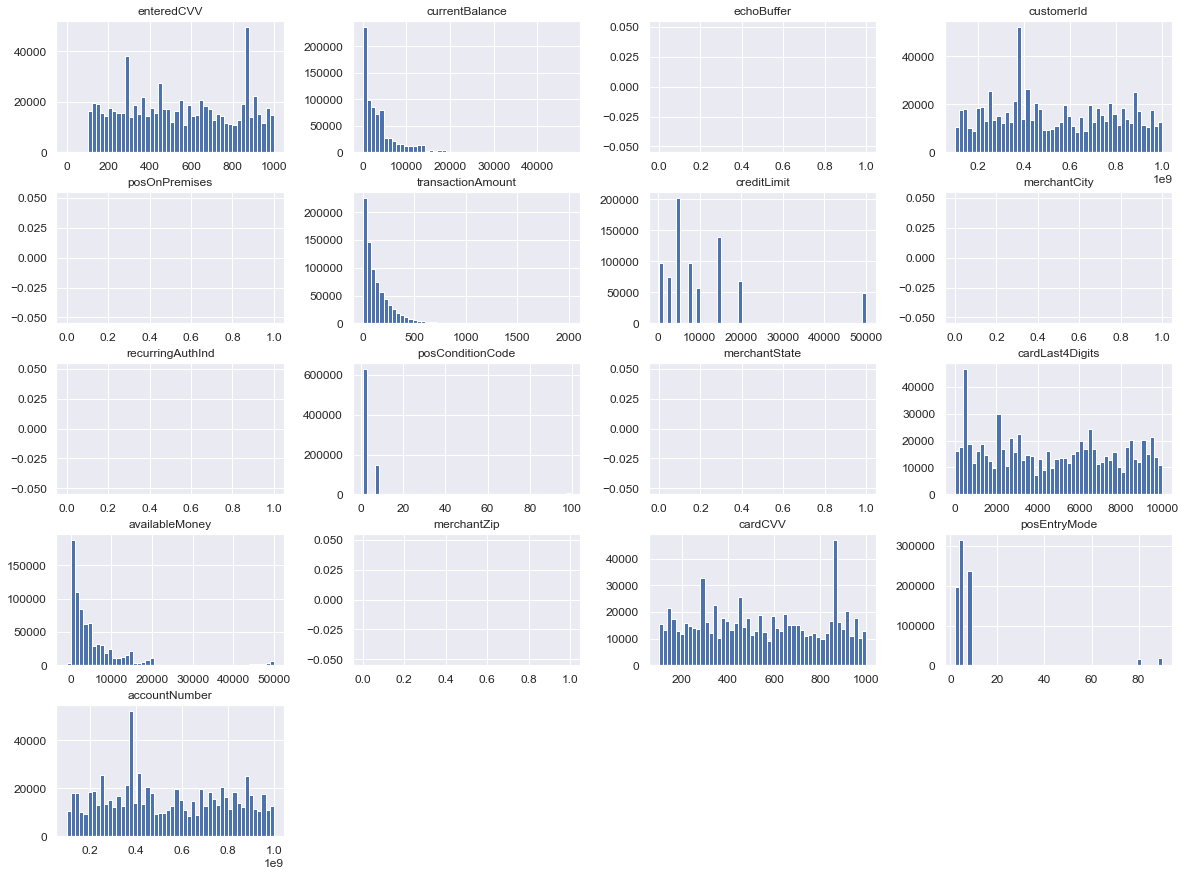

In [65]:
#Visulize each numerical feature in transaction
%matplotlib inline
import matplotlib.pyplot as plt


num_data = transaction[num_list]
num_data.hist(bins=50, figsize=(20,15))

plt.show()

##thoughts
#1. from the graph, availableMoney and transactionAmount, as well as the currentBalance, these 3 variables' graphs are 
#highly similar, which means the correlation between them maybe high. 
#2. customerId and accountNumber should be the same variable since theoratically each customer should have only 1 
#account number

In [66]:
transaction['accountNumber'] == transaction['customerId']

0         True
1         True
2         True
3         True
4         True
          ... 
786358    True
786359    True
786360    True
786361    True
786362    True
Length: 786363, dtype: bool

In [67]:
#the output array is empty. Which means, these two columns are exactly the same and we can delete one of them. 
print(np.where(transaction['accountNumber'] != transaction['customerId']))

(array([], dtype=int64),)


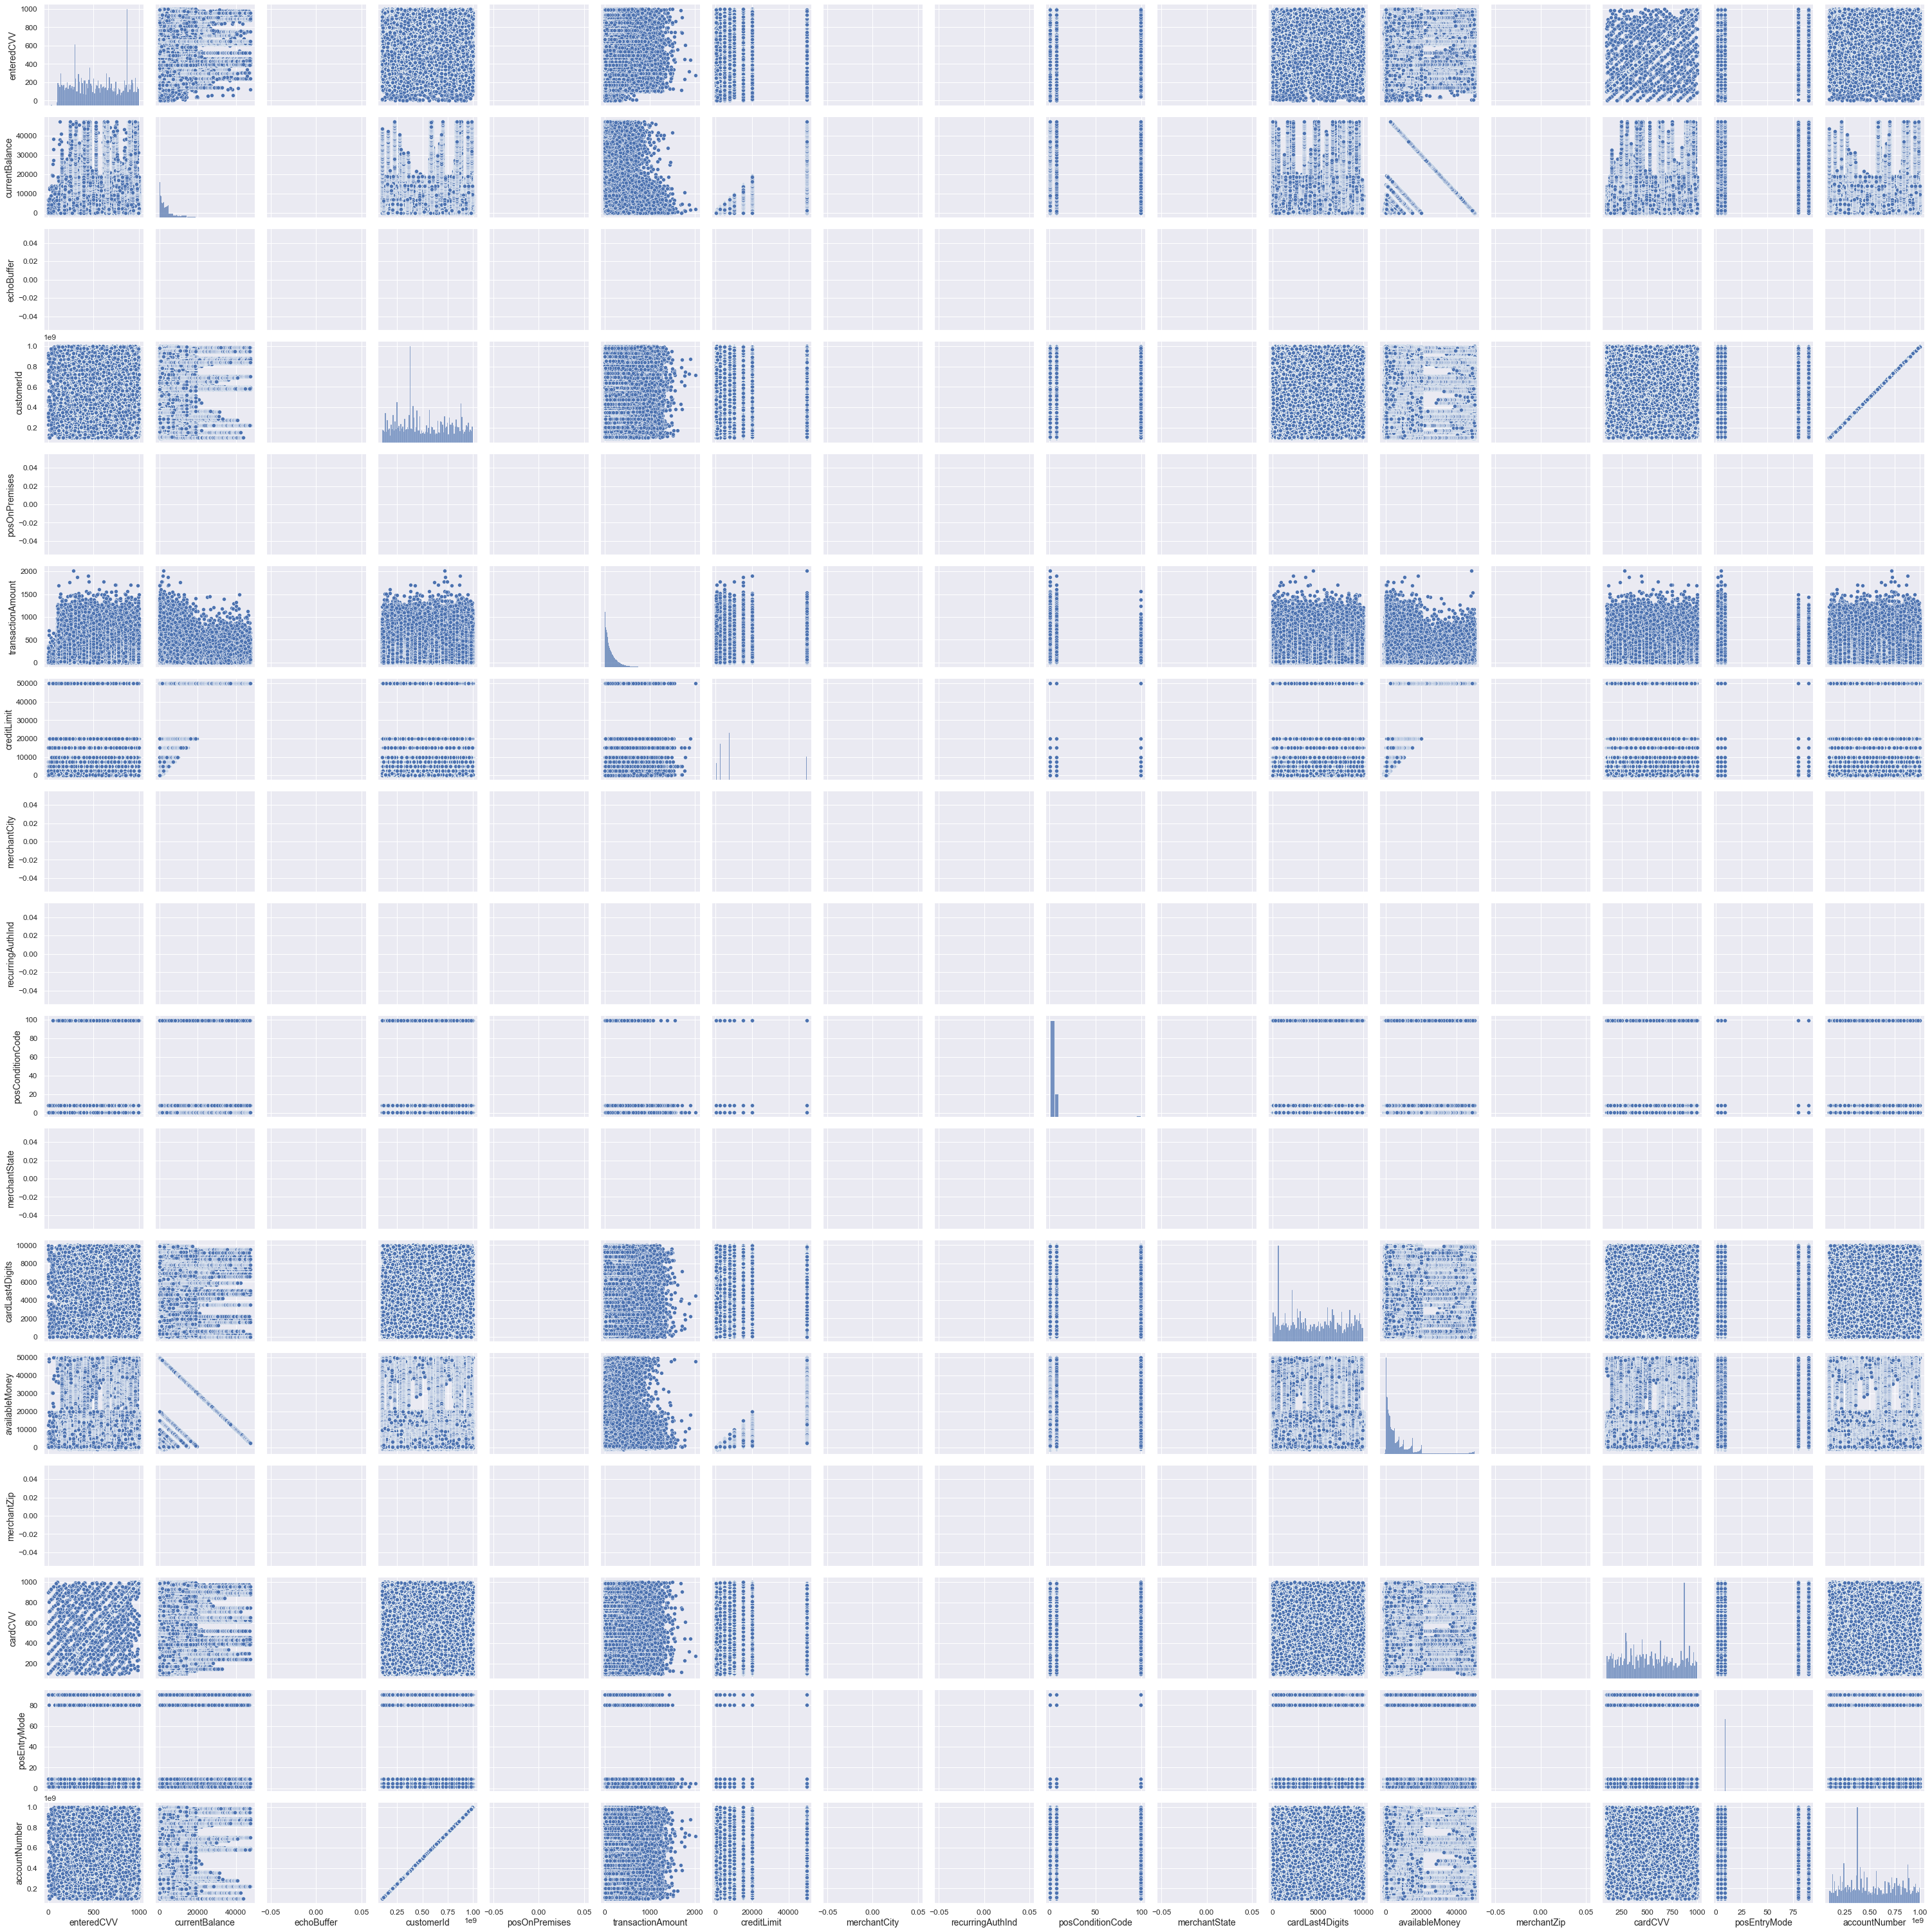

In [68]:
#to get the correlation scatter plot, the isFraud column (True and False) must be changed to 1 and 0. 
transaction["isFraud"] = transaction["isFraud"].astype(int)
from pandas.plotting import scatter_matrix

sns.pairplot(transaction[num_list])

<AxesSubplot:>

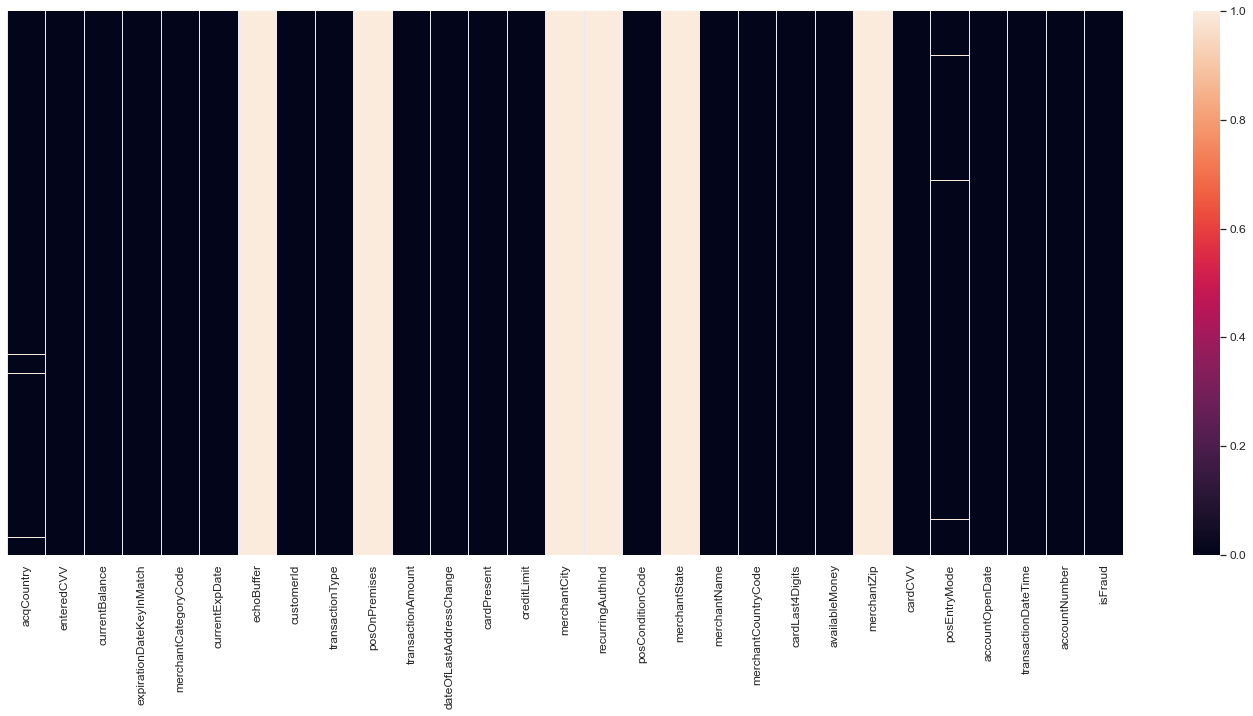

In [69]:
#use heatmap to indicate which column has lots of NA value
plt.figure(figsize = (25,10))
sns.heatmap(transaction.isnull(), xticklabels=True, yticklabels=False)
#From the heatmap we can see the column echoBuffer, posOnPremises, merchantCity, recurringAuthInd, 
#merchantState, merchantZip are almost all NA value. So we can drop them

<AxesSubplot:>

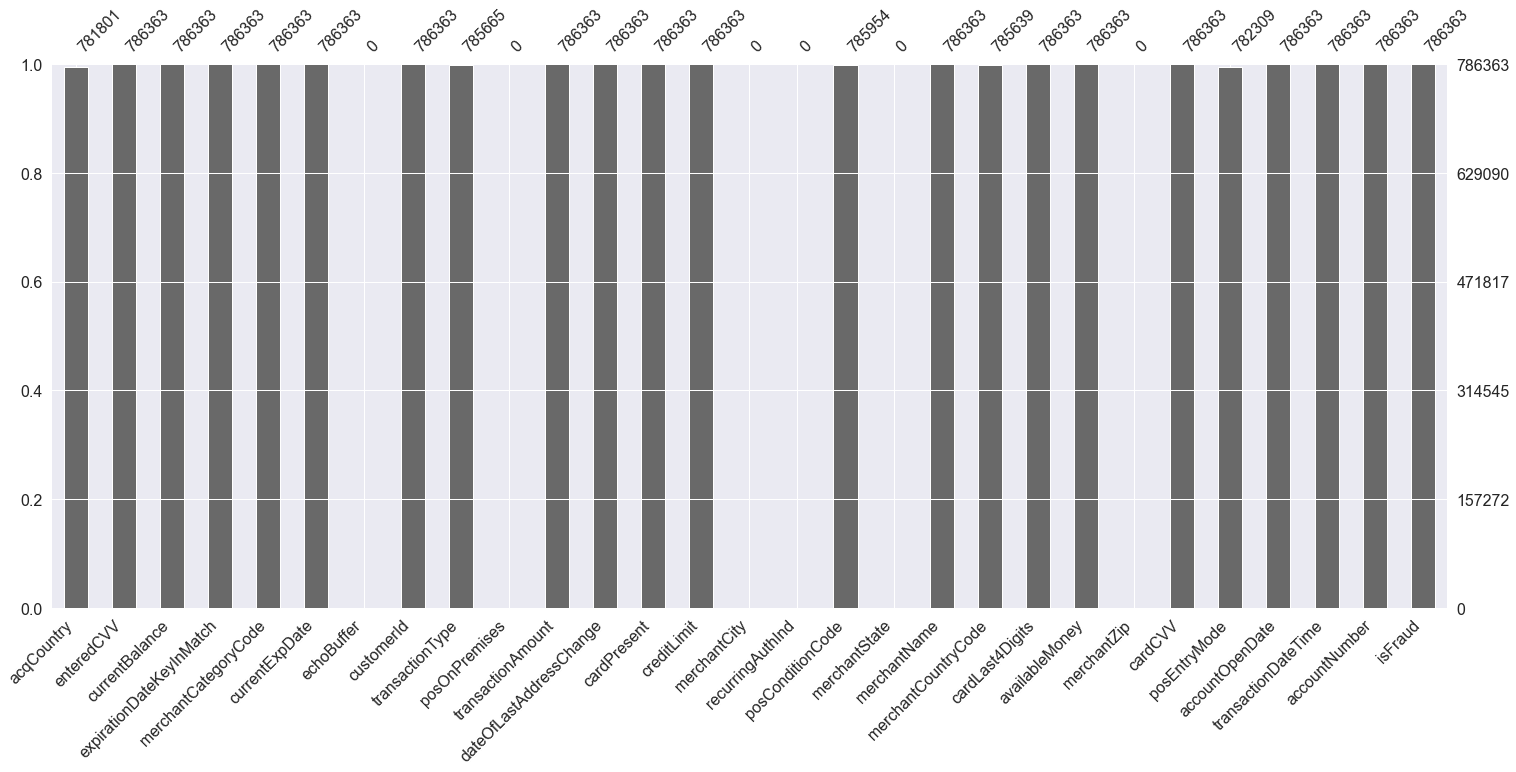

In [70]:
#use msno to indicate null value. The conclusion is the same with above heatmap but the visualization is clearer.
msno.bar(transaction)

isFraud                     1.000000
transactionAmount           0.075651
enteredCVV                  0.008655
cardCVV                     0.008652
posConditionCode            0.008155
posEntryMode                0.007886
currentBalance              0.007715
creditLimit                 0.003108
cardLast4Digits             0.000886
expirationDateKeyInMatch   -0.000972
availableMoney             -0.001538
accountNumber              -0.004011
customerId                 -0.004011
cardPresent                -0.043418
echoBuffer                       NaN
posOnPremises                    NaN
merchantCity                     NaN
recurringAuthInd                 NaN
merchantState                    NaN
merchantZip                      NaN
Name: isFraud, dtype: float64


<AxesSubplot:>

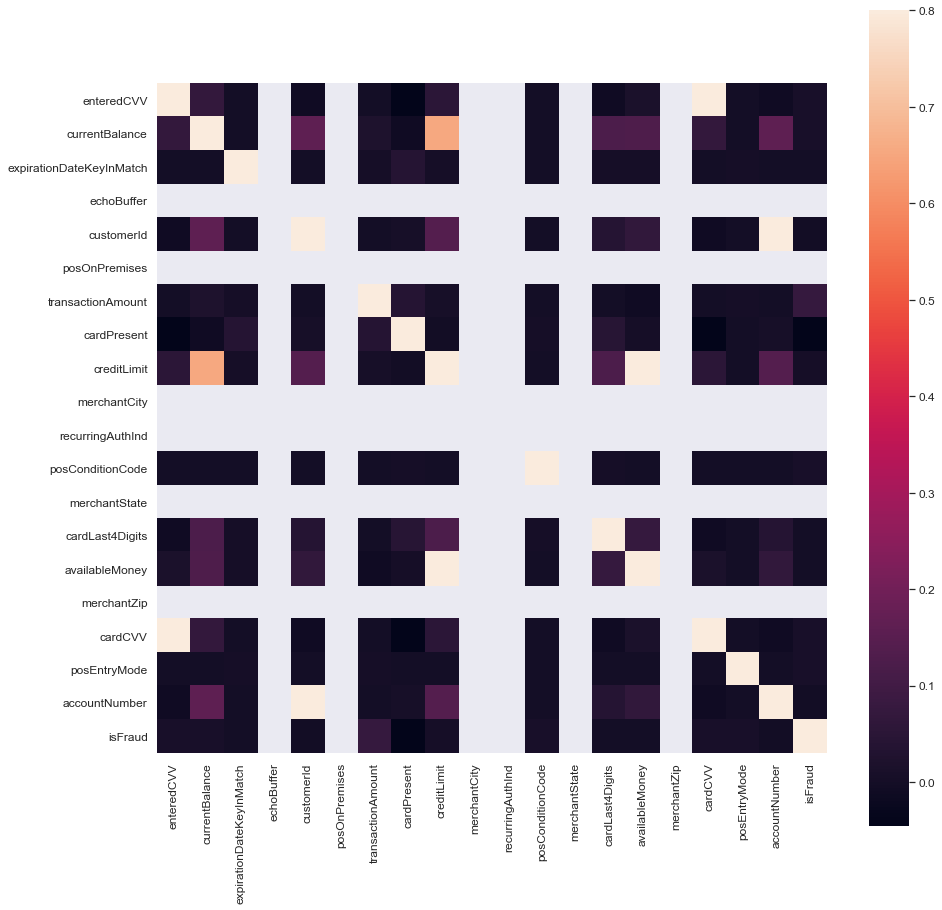

In [71]:
#Use heatmap to identify the correlation. 
correlation  = transaction.corr()
corr = correlation["isFraud"].sort_values(ascending=False)
print(correlation["isFraud"].sort_values(ascending=False))
plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, vmax=.8, square=True)
#such graph is meaningless without engineering since all the correlation is exteremely low. 
#this circumstance is caused by the supper unbalanced data

Text(0.5, 1.0, 'Graph showing Number of Fraud vs Non-Fraud')

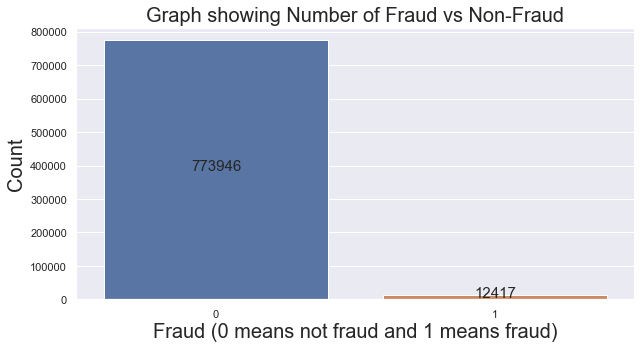

In [72]:
#comparing the fraud and non-fraud cases
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='isFraud', data = transaction)
plt.xlabel('Fraud (0 means not fraud and 1 means fraud)', fontsize=20)
plt.ylabel('Count', fontsize=20)
fraudnt, fraud = transaction.isFraud.value_counts()
plt.text(0, fraudnt//2, fraudnt, fontsize = 15,  horizontalalignment='center')
plt.text(1, fraud//2, fraud, fontsize = 15, horizontalalignment='center')

plt.title('Graph showing Number of Fraud vs Non-Fraud', fontsize = 20)

#the graph indicates that the data is exteremly inbalanced. So it's necessary to deal with this situation later

<AxesSubplot:>

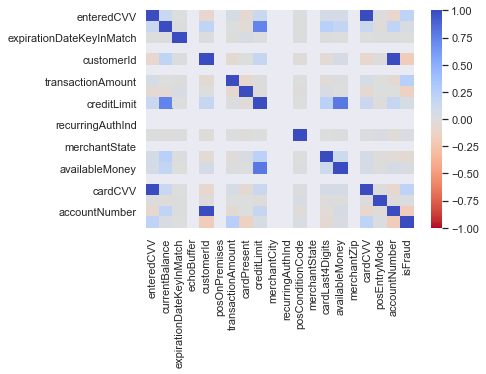

In [73]:
fraud_transaction = transaction.loc[transaction['isFraud'] == 1]
non_fraud_transaction = transaction.loc[transaction['isFraud'] == 0][:fraud]
sub_transaction = pd.concat([fraud_transaction, non_fraud_transaction]).sample(frac=1, random_state=420).reset_index(drop=True)
sns.heatmap(sub_transaction.corr(), cmap='coolwarm_r', vmin = -1, vmax = 1, center = 0)

# 3. Prepare the data for Machine Learning Algorithms

###### note: if there is some new variable whose type is float64/int64 but produced from categorical variable, then such variable will be recorded as numerical feature but be written under "3.3 Categorical features processing and engineering"

### 3.1 Numerical features processing

In [74]:
#Calculating the missing value percentage
pd.set_option('display.max_rows', 100)
percent_missing = transaction.isnull().sum() * 100 / len(transaction)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})

missing_value_df.sort_values(by=['percent_missing'], inplace=True, ascending = False)

missing_value_df.head(15)

,percent_missing
merchantCity,100.000000
echoBuffer,100.000000
merchantZip,100.000000
merchantState,100.000000
recurringAuthInd,100.000000
posOnPremises,100.000000
acqCountry,0.580139
posEntryMode,0.515538
merchantCountryCode,0.092069
transactionType,0.088763


In [75]:
#delete the columns filled with NAN(over 80%)
transaction = transaction.drop(['echoBuffer', 'posOnPremises', 'merchantCity', 'recurringAuthInd', 
                  'merchantState', 'merchantZip'],  axis = 1)

transaction.head()

,acqCountry,enteredCVV,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,currentExpDate,customerId,transactionType,transactionAmount,dateOfLastAddressChange,cardPresent,creditLimit,posConditionCode,merchantName,merchantCountryCode,cardLast4Digits,availableMoney,cardCVV,posEntryMode,accountOpenDate,transactionDateTime,accountNumber,isFraud
0,US,414,0.0,False,rideshare,06/2023,737265056,PURCHASE,98.55,2015-03-14,False,5000.0,1.0,Uber,US,1803,5000.0,414,2.0,2015-03-14,2016-08-13T14:27:32,737265056,0
1,US,486,0.0,False,entertainment,02/2024,737265056,PURCHASE,74.51,2015-03-14,True,5000.0,1.0,AMC #191138,US,767,5000.0,486,9.0,2015-03-14,2016-10-11T05:05:54,737265056,0
2,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,False,5000.0,1.0,Play Store,US,767,5000.0,486,9.0,2015-03-14,2016-11-08T09:18:39,737265056,0
3,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,False,5000.0,1.0,Play Store,US,767,5000.0,486,9.0,2015-03-14,2016-12-10T02:14:50,737265056,0
4,US,885,0.0,False,fastfood,10/2029,830329091,PURCHASE,71.18,2015-08-06,True,5000.0,1.0,Tim Hortons #947751,US,3143,5000.0,885,2.0,2015-08-06,2016-03-24T21:04:46,830329091,0


In [76]:
#next we deal with the quantitive columns need to be deleted first. check the columns we just dropped are in which type of data
for i in ['echoBuffer', 'posOnPremises', 'merchantCity', 'recurringAuthInd', 
                  'merchantState', 'merchantZip', 'acqCountry'
          , 'customerId', 'accountNumber']:
    if i in num_list:
        print(i, "------num_list")
    elif i in cat_list:
        print(i, "------cat_list")
    else:
        print(i, "------bool")
        


echoBuffer ------num_list
posOnPremises ------num_list
merchantCity ------num_list
recurringAuthInd ------num_list
merchantState ------num_list
merchantZip ------num_list
acqCountry ------cat_list
customerId ------num_list
accountNumber ------num_list


In [77]:
#remove the NA column
for i in ['echoBuffer', 'posOnPremises', 'merchantCity', 'recurringAuthInd', 
                  'merchantState', 'merchantZip', 'accountNumber', 'customerId', 
          'enteredCVV', 'cardCVV','cardLast4Digits']:
    num_list.remove(i)

len(num_list)

6

In [78]:
#Create the imputer
imputer = SimpleImputer(strategy='median')
#Fit the imputer to the numeric colums
imputer.fit(transaction[num_list])
list(imputer.statistics_)

[2451.76, 87.9, 7500.0, 1.0, 3184.86, 5.0]

In [79]:
#use imputer.transform to fill all NaN in the numerical features with the columns' median
transaction[num_list] = imputer.transform(transaction[num_list])

#Check the null percentage of quantitive features
num_percent_missing = transaction[num_list].isnull().sum() * 100 / len(transaction[num_list])
missing_value_df = pd.DataFrame({
                                 'num_percent_missing': num_percent_missing})

missing_value_df.sort_values(by=['num_percent_missing'], inplace=True, ascending = False)
missing_value_df.head(100)
#no more missing value

,num_percent_missing
currentBalance,0.0
transactionAmount,0.0
creditLimit,0.0
posConditionCode,0.0
availableMoney,0.0
posEntryMode,0.0


In [80]:
pd.set_option('display.max_columns', 20)
transaction_fillmed = transaction
transaction_fillmed[num_list].head()

,currentBalance,transactionAmount,creditLimit,posConditionCode,availableMoney,posEntryMode
0,0.0,98.55,5000.0,1.0,5000.0,2.0
1,0.0,74.51,5000.0,1.0,5000.0,9.0
2,0.0,7.47,5000.0,1.0,5000.0,9.0
3,0.0,7.47,5000.0,1.0,5000.0,9.0
4,0.0,71.18,5000.0,1.0,5000.0,2.0


### 3.2 numerical features engineering 

thoughts about engineering

1. enteredCVV and cardCVV are meaningless if we check them seperately. what's important is 
whether the customer incorrectly

2. card last 4 digits has almost no correlation with isFraud. So we can delete it even it's not filled with NA

3. transactionAmount and availableMoney are both important variables. But the proportion of them, transactionAmount/availableMoney is also significant

4. similarly, availableMoney/creditLimit is important

5. accountnumber itself is almost unrelatted with isFraud

##### 3.2.1

In [81]:
transaction_fillmed['correctCVV'] = (transaction['enteredCVV'] == transaction['cardCVV'])

In [82]:
#the output array is not empty. Which means, these two columns are exactly the same and we can delete one of them. 
print(np.where(transaction['enteredCVV'] != transaction['cardCVV']))

(array([    19,    100,    101, ..., 786228, 786265, 786311]),)


In [83]:
# number of wrong CVV entered
transaction_fillmed.correctCVV.value_counts()

True     779348
False      7015
Name: correctCVV, dtype: int64

In [84]:
# proportion of people entering CVV incorrectly
transaction_fillmed.correctCVV.value_counts().loc[False]/transaction_fillmed.correctCVV.value_counts().loc[True]

0.00900111375149484

##### 3.2.3

In [85]:
transaction_fillmed['transproportion'] = (transaction['transactionAmount'] / transaction['availableMoney'])

In [86]:
transaction_fillmed['transproportion'].value_counts()

0.000000    22225
0.000604       22
0.000527       19
0.003166       19
0.000756       17
            ...  
0.134123        1
0.003694        1
0.006676        1
0.009229        1
0.686108        1
Name: transproportion, Length: 755151, dtype: int64

##### 3.2.4

In [87]:
transaction_fillmed['availableproportion'] = (transaction['availableMoney'] / transaction['creditLimit'])

In [88]:
transaction_fillmed['availableproportion'].value_counts()

1.000000    33678
0.999396       15
0.983080       14
0.991973       14
0.998460       13
            ...  
0.216181        1
0.213852        1
0.140724        1
0.479098        1
0.500000        1
Name: availableproportion, Length: 544465, dtype: int64

In [89]:

for i in ['availableproportion', 'transproportion']:
    num_list.append(i)

num_list

['currentBalance',
 'transactionAmount',
 'creditLimit',
 'posConditionCode',
 'availableMoney',
 'posEntryMode',
 'availableproportion',
 'transproportion']

In [90]:
transaction_fillmed[num_list].head()

,currentBalance,transactionAmount,creditLimit,posConditionCode,availableMoney,posEntryMode,availableproportion,transproportion
0,0.0,98.55,5000.0,1.0,5000.0,2.0,1.0,0.019710
1,0.0,74.51,5000.0,1.0,5000.0,9.0,1.0,0.014902
2,0.0,7.47,5000.0,1.0,5000.0,9.0,1.0,0.001494
3,0.0,7.47,5000.0,1.0,5000.0,9.0,1.0,0.001494
4,0.0,71.18,5000.0,1.0,5000.0,2.0,1.0,0.014236


### 3.3 categorical features processing and engineering

##### 3.3.1  fill all the NA value in the categorical features' columns

In [91]:
transaction_fillmed[cat_list].head()

,acqCountry,merchantCategoryCode,currentExpDate,transactionType,dateOfLastAddressChange,merchantName,merchantCountryCode,accountOpenDate,transactionDateTime
0,US,rideshare,06/2023,PURCHASE,2015-03-14,Uber,US,2015-03-14,2016-08-13T14:27:32
1,US,entertainment,02/2024,PURCHASE,2015-03-14,AMC #191138,US,2015-03-14,2016-10-11T05:05:54
2,US,mobileapps,08/2025,PURCHASE,2015-03-14,Play Store,US,2015-03-14,2016-11-08T09:18:39
3,US,mobileapps,08/2025,PURCHASE,2015-03-14,Play Store,US,2015-03-14,2016-12-10T02:14:50
4,US,fastfood,10/2029,PURCHASE,2015-08-06,Tim Hortons #947751,US,2015-08-06,2016-03-24T21:04:46


In [92]:
#the array is not empty. if dateOfLastAddressChange = accountOpenDate, then it means the customer has never edited
##the address. So create another column naming addresschange. (filled with True and False.)
print(np.where(transaction['dateOfLastAddressChange'] != transaction['accountOpenDate']))

(array([   301,    302,    303, ..., 785773, 785774, 785775]),)


In [93]:
#Check the null percentage of catgorical features
pd.set_option('display.max_rows', 50)
cat_percent_missing = transaction_fillmed[cat_list].isnull().sum() * 100 / len(transaction_fillmed[cat_list])
missing_value_df = pd.DataFrame({
                                 'cat_percent_missing': cat_percent_missing})

missing_value_df.sort_values(by=['cat_percent_missing'], inplace=True, ascending = False)
missing_value_df

,cat_percent_missing
acqCountry,0.580139
merchantCountryCode,0.092069
transactionType,0.088763
merchantCategoryCode,0.000000
currentExpDate,0.000000
dateOfLastAddressChange,0.000000
merchantName,0.000000
accountOpenDate,0.000000
transactionDateTime,0.000000


In [94]:
transaction_fillmed[cat_list] = transaction_fillmed[cat_list].apply(lambda x: x.fillna(x.value_counts().index[0]))
transaction_fillmed[cat_list]

,acqCountry,merchantCategoryCode,currentExpDate,transactionType,dateOfLastAddressChange,merchantName,merchantCountryCode,accountOpenDate,transactionDateTime
0,US,rideshare,06/2023,PURCHASE,2015-03-14,Uber,US,2015-03-14,2016-08-13T14:27:32
1,US,entertainment,02/2024,PURCHASE,2015-03-14,AMC #191138,US,2015-03-14,2016-10-11T05:05:54
2,US,mobileapps,08/2025,PURCHASE,2015-03-14,Play Store,US,2015-03-14,2016-11-08T09:18:39
3,US,mobileapps,08/2025,PURCHASE,2015-03-14,Play Store,US,2015-03-14,2016-12-10T02:14:50
4,US,fastfood,10/2029,PURCHASE,2015-08-06,Tim Hortons #947751,US,2015-08-06,2016-03-24T21:04:46
...,...,...,...,...,...,...,...,...,...
786358,US,rideshare,12/2022,PURCHASE,2012-08-23,Lyft,US,2012-08-23,2016-12-22T18:44:12
786359,US,online_subscriptions,08/2023,PURCHASE,2012-08-23,hulu.com,US,2012-08-23,2016-12-25T16:20:34
786360,US,rideshare,08/2025,PURCHASE,2012-08-23,Lyft,US,2012-08-23,2016-12-27T15:46:24
786361,US,online_retail,07/2022,PURCHASE,2012-08-23,walmart.com,US,2012-08-23,2016-12-29T00:30:55


###### 3.3.2  there are lots of duplicates in the merchantName column due to the different order number. Try to delete these. (from 2490 to 205)

In [47]:
pd.set_option('display.max_columns', 2500)
transaction_fillmed['merchantName'].value_counts()

Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Runners #383214                      2
Sprint Communications #561941        2
TMobile Wireless #602341             1
EZ Wireless #149871                  1
Curves #849125                       1
Name: merchantName, Length: 2490, dtype: int64

In [48]:
#in the merchant name, there are lots of items but most of them are actually the same--if we delete the order number
for i in range(0, len(transaction_fillmed)):
    if '#' in transaction_fillmed.iloc[i].merchantName:
        d = transaction_fillmed.iloc[i].merchantName[:(transaction_fillmed.iloc[i].merchantName.find('#')-1)]
        transaction_fillmed.loc[i, 'merchantName'] = d
        


KeyboardInterrupt: 

In [ ]:
transaction_fillmed['merchantName'].value_counts()

In [ ]:
transaction_fillmed.head()

##### 3.3.3  based on account open date and expiration date, calculate the valid time of credit card(in month). 

In [95]:
#creat the validtime variable, measuring the valid time for the credit card
transaction_fillmed['validtime'] = transaction_fillmed['accountOpenDate']
transaction_fillmed.head()

,acqCountry,enteredCVV,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,currentExpDate,customerId,transactionType,transactionAmount,dateOfLastAddressChange,...,cardCVV,posEntryMode,accountOpenDate,transactionDateTime,accountNumber,isFraud,correctCVV,transproportion,availableproportion,validtime
0,US,414,0.0,False,rideshare,06/2023,737265056,PURCHASE,98.55,2015-03-14,...,414,2.0,2015-03-14,2016-08-13T14:27:32,737265056,0,True,0.019710,1.0,2015-03-14
1,US,486,0.0,False,entertainment,02/2024,737265056,PURCHASE,74.51,2015-03-14,...,486,9.0,2015-03-14,2016-10-11T05:05:54,737265056,0,True,0.014902,1.0,2015-03-14
2,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,...,486,9.0,2015-03-14,2016-11-08T09:18:39,737265056,0,True,0.001494,1.0,2015-03-14
3,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,...,486,9.0,2015-03-14,2016-12-10T02:14:50,737265056,0,True,0.001494,1.0,2015-03-14
4,US,885,0.0,False,fastfood,10/2029,830329091,PURCHASE,71.18,2015-08-06,...,885,2.0,2015-08-06,2016-03-24T21:04:46,830329091,0,True,0.014236,1.0,2015-08-06


In [96]:
#calculate the time difference between the expdate and accountopendate, then fill such value into validtime. 
for i in range(0, len(transaction_fillmed)):
    YExp = transaction_fillmed.iloc[i].currentExpDate[3:7]
    MExp = transaction_fillmed.iloc[i].currentExpDate[0:2]
 
    YOpe = transaction_fillmed.iloc[i].accountOpenDate[0:4]
    MOpe = transaction_fillmed.iloc[i].accountOpenDate[5:7] 
    
    if int(MExp) < int(MOpe):
        time = 12*(int(YExp) -int(YOpe) - 1) + 12 - int(MOpe) + int(MExp)
    else:
        time = 12*(int(YExp) -int(YOpe)) - int(MOpe) + int(MExp)
    transaction_fillmed.loc[i, 'validtime'] = time

    
    
transaction_fillmed.head()


,acqCountry,enteredCVV,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,currentExpDate,customerId,transactionType,transactionAmount,dateOfLastAddressChange,...,cardCVV,posEntryMode,accountOpenDate,transactionDateTime,accountNumber,isFraud,correctCVV,transproportion,availableproportion,validtime
0,US,414,0.0,False,rideshare,06/2023,737265056,PURCHASE,98.55,2015-03-14,...,414,2.0,2015-03-14,2016-08-13T14:27:32,737265056,0,True,0.019710,1.0,99
1,US,486,0.0,False,entertainment,02/2024,737265056,PURCHASE,74.51,2015-03-14,...,486,9.0,2015-03-14,2016-10-11T05:05:54,737265056,0,True,0.014902,1.0,107
2,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,...,486,9.0,2015-03-14,2016-11-08T09:18:39,737265056,0,True,0.001494,1.0,125
3,US,486,0.0,False,mobileapps,08/2025,737265056,PURCHASE,7.47,2015-03-14,...,486,9.0,2015-03-14,2016-12-10T02:14:50,737265056,0,True,0.001494,1.0,125
4,US,885,0.0,False,fastfood,10/2029,830329091,PURCHASE,71.18,2015-08-06,...,885,2.0,2015-08-06,2016-03-24T21:04:46,830329091,0,True,0.014236,1.0,170


##### 3.3.4  check if the customer has changed their address after the account open date. (noaddresschange) (bool)

In [97]:
transaction_fillmed['noaddresschange'] = (transaction_fillmed['dateOfLastAddressChange'] == transaction_fillmed['accountOpenDate'])

##### 3.3.5  check if the customer made the purchase in a different country. 

In [98]:
transaction_fillmed['samecountry'] = (transaction_fillmed['acqCountry'] == transaction_fillmed['merchantCountryCode'])

In [99]:
num_list

['currentBalance',
 'transactionAmount',
 'creditLimit',
 'posConditionCode',
 'availableMoney',
 'posEntryMode',
 'availableproportion',
 'transproportion']

##### 3.3.6 check if the customer made the purchase in an abnormal time (1am to 6am). 

In [113]:
abnormal = ['01','02','03','04','05','06']

for i in range(0, len(transaction_fillmed)):

    ifabnormal = (transaction_fillmed.iloc[i].transactionDateTime[11:13] in abnormal)
    transaction_fillmed.loc[i, 'abnormaltime'] = ifabnormal

In [114]:
transaction_fillmed['abnormaltime']

0         False
1          True
2         False
3          True
4         False
          ...  
786358    False
786359    False
786360    False
786361    False
786362    False
Name: abnormaltime, Length: 786363, dtype: object

In [115]:
transaction_fillmed['abnormaltime'].value_counts()

False    590532
True     195831
Name: abnormaltime, dtype: int64

##### 3.3.7  transfer all the new variables to the correct list. 

In [103]:
for i in ['currentExpDate', 'accountOpenDate', 'transactionDateTime', 'merchantName', 'dateOfLastAddressChange']:
    cat_list.remove(i)


In [104]:
num_list = num_list[:-1]

In [105]:
num_list

['currentBalance',
 'transactionAmount',
 'creditLimit',
 'posConditionCode',
 'availableMoney',
 'posEntryMode',
 'availableproportion']

In [106]:
for i in ['validtime']:
    num_list.append(i)

In [107]:
for i in ['correctCVV', 'noaddresschange', 'sameCountry']:
    bool_list.append(i)



In [119]:
for i in ['abnormaltime']:
    bool_list.append(i)

In [120]:
cat_list

['acqCountry',
 'merchantCategoryCode',
 'transactionType',
 'merchantCountryCode']

In [121]:
num_list

['currentBalance',
 'transactionAmount',
 'creditLimit',
 'posConditionCode',
 'availableMoney',
 'posEntryMode',
 'availableproportion',
 'validtime']

In [130]:
bool_list.remove('sameCountry')

In [131]:
bool_list.append('samecountry')

##### Final features entering model

1) num_list: ['currentBalance',
 'transactionAmount',
 'creditLimit',
 'posConditionCode',
 'availableMoney',
 'posEntryMode',
 'availableproportion',
 'transproportion',
 'availableproportion',
 'validtime']

2) cat_list: ['acqCountry',
 'merchantCategoryCode',
 'transactionType',
 'merchantCountryCode']

3) bool_list: ['expirationDateKeyInMatch',
 'cardPresent',
 'isFraud',
 'correctCVV',
 'noaddresschange',
 'samecountry', 'abnormaltime']

##### 3.3.8 encoding the categorical colums

In [123]:
from sklearn.preprocessing import OneHotEncoder
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# 2. Fit the encoder to the categorical colums
encoder.fit(transaction_fillmed[cat_list])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [124]:
encoded_cols = list(encoder.get_feature_names(cat_list))
encoded_cols

['acqCountry_CAN',
 'acqCountry_MEX',
 'acqCountry_PR',
 'acqCountry_US',
 'merchantCategoryCode_airline',
 'merchantCategoryCode_auto',
 'merchantCategoryCode_cable/phone',
 'merchantCategoryCode_entertainment',
 'merchantCategoryCode_fastfood',
 'merchantCategoryCode_food',
 'merchantCategoryCode_food_delivery',
 'merchantCategoryCode_fuel',
 'merchantCategoryCode_furniture',
 'merchantCategoryCode_gym',
 'merchantCategoryCode_health',
 'merchantCategoryCode_hotels',
 'merchantCategoryCode_mobileapps',
 'merchantCategoryCode_online_gifts',
 'merchantCategoryCode_online_retail',
 'merchantCategoryCode_online_subscriptions',
 'merchantCategoryCode_personal care',
 'merchantCategoryCode_rideshare',
 'merchantCategoryCode_subscriptions',
 'transactionType_ADDRESS_VERIFICATION',
 'transactionType_PURCHASE',
 'transactionType_REVERSAL',
 'merchantCountryCode_CAN',
 'merchantCountryCode_MEX',
 'merchantCountryCode_PR',
 'merchantCountryCode_US']

In [125]:
#encode the columns and combine the data_fillmed[encoded_cols] and data_fillmed[quant_list] together.
transaction_fillmed[encoded_cols]=pd.get_dummies(transaction_fillmed[cat_list])

##### 3.3.9 encoding the bool colums

In [132]:
for i in bool_list:
    transaction_fillmed[i] = transaction_fillmed[i].astype(int)

In [134]:
transaction_fillmed[bool_list]

,expirationDateKeyInMatch,cardPresent,isFraud,correctCVV,noaddresschange,abnormaltime,samecountry
0,0,0,0,1,1,0,1
1,0,1,0,1,1,1,1
2,0,0,0,1,1,0,1
3,0,0,0,1,1,1,1
4,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...
786358,0,0,0,1,1,0,1
786359,0,0,0,1,1,0,1
786360,0,0,0,1,1,0,1
786361,0,0,0,1,1,0,1


In [135]:
X_train_test = transaction_fillmed[bool_list + encoded_cols + num_list]
X_train_test.head()
X_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 45 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   expirationDateKeyInMatch                   786363 non-null  int64  
 1   cardPresent                                786363 non-null  int64  
 2   isFraud                                    786363 non-null  int64  
 3   correctCVV                                 786363 non-null  int64  
 4   noaddresschange                            786363 non-null  int64  
 5   abnormaltime                               786363 non-null  int64  
 6   samecountry                                786363 non-null  int64  
 7   acqCountry_CAN                             786363 non-null  uint8  
 8   acqCountry_MEX                             786363 non-null  uint8  
 9   acqCountry_PR                              786363 non-null  uint8  
 10  acqCount

In [136]:

X_train_test['validtime'] = X_train_test['validtime'].apply(pd.to_numeric, errors='ignore')

<ipython-input-136-9dc0ab521878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test['validtime'] = X_train_test['validtime'].apply(pd.to_numeric, errors='ignore')


In [137]:
df = X_train_test.copy()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 45 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   expirationDateKeyInMatch                   786363 non-null  int64  
 1   cardPresent                                786363 non-null  int64  
 2   isFraud                                    786363 non-null  int64  
 3   correctCVV                                 786363 non-null  int64  
 4   noaddresschange                            786363 non-null  int64  
 5   abnormaltime                               786363 non-null  int64  
 6   samecountry                                786363 non-null  int64  
 7   acqCountry_CAN                             786363 non-null  uint8  
 8   acqCountry_MEX                             786363 non-null  uint8  
 9   acqCountry_PR                              786363 non-null  uint8  
 10  acqCount

# 4. Prepare the data for ML & Model Development

##### 4.1.1 undersampling with Logestic Regression

In [139]:
#shuffling the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:12417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,expirationDateKeyInMatch,cardPresent,isFraud,correctCVV,noaddresschange,abnormaltime,samecountry,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,...,merchantCountryCode_PR,merchantCountryCode_US,currentBalance,transactionAmount,creditLimit,posConditionCode,availableMoney,posEntryMode,availableproportion,validtime
512204,0,0,0,1,0,0,1,0,0,0,...,0,1,9990.19,74.94,15000.0,1.0,5009.81,2.0,0.333987,57
514064,0,0,0,1,1,0,1,0,0,0,...,0,1,117.67,190.01,1000.0,1.0,882.33,5.0,0.882330,236
346985,0,0,1,1,1,1,1,0,0,0,...,0,1,0.00,109.00,5000.0,1.0,5000.00,9.0,1.000000,56
152631,0,0,1,1,0,0,1,0,0,0,...,0,1,20828.14,451.15,50000.0,1.0,29171.86,9.0,0.583437,124
134274,0,0,1,1,0,1,1,0,0,0,...,0,1,1633.12,35.03,5000.0,1.0,3366.88,2.0,0.673376,218


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: isFraud, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


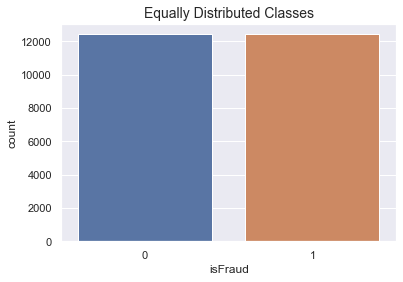

In [141]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))



sns.countplot('isFraud', data = new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [145]:
normal = new_df[new_df['isFraud'] == 0]
fraud = new_df[new_df['isFraud'] == 1]

In [146]:
print (normal.shape, fraud.shape)

(12417, 45) (12417, 45)


In [147]:
X = new_df.drop('isFraud', axis = 1)
y = new_df['isFraud']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [157]:

logmodel = LogisticRegression(solver = 'lbfgs', max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [158]:
kfold = StratifiedKFold(n_splits = 10)
print(logmodel)
print("CV Auc :", cross_val_score(logmodel, X_train, y_train, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(logmodel, X_train, y_train, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(logmodel, X_train, y_train, scoring = 'recall', cv = kfold).mean())

LogisticRegression(max_iter=100000)
CV Auc : 0.6592910846812388
CV Precision : 0.6333729041963465
CV Recall : 0.5601270541614323


##### 4.1.2 undersampling with randomforest

In [160]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [166]:
kfold = StratifiedKFold(n_splits = 10)
print(random_forest)
print("CV Auc :", cross_val_score(random_forest, X_train, y_train, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(random_forest, X_train, y_train, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(random_forest, X_train, y_train, scoring = 'recall', cv = kfold).mean())

RandomForestClassifier()
CV Auc : 0.7500060931639894
CV Precision : 0.6885145580690286
CV Recall : 0.6784601321608399


In [165]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

predictions = cross_val_predict(random_forest, X_train, y_train, cv= 10)
confusion_matrix(y_train, predictions)

array([[6913, 3058],
       [3127, 6769]])

##### 4.1.3 undersampling with GBDT

In [169]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
print(gbdt)
print("CV Auc :", cross_val_score(gbdt, X_train, y_train, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(gbdt, X_train, y_train, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(gbdt, X_train, y_train, scoring = 'recall', cv = kfold).mean())


GradientBoostingClassifier()
CV Auc : 0.7568331702073895
CV Precision : 0.6906667929817796
CV Recall : 0.6792665788317962


##### 4.2.1 oversampling with Logestic Regression

In [175]:

X = df.copy().drop('isFraud', axis=1)
y = df.copy().isFraud

In [176]:
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify  = y, random_state = 42)

In [177]:
sm = SMOTE(random_state = 666)

# New training dataset with smote applied to it
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

Text(1, 309578, '619156')

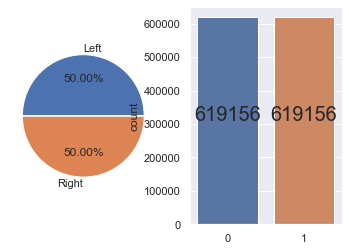

In [178]:
plt.subplot(121)
plt.pie(x = [len(y_train_s)- sum(y_train_s), sum(y_train_s)],
        labels = ["Left", "Right"], autopct='%1.2f%%', explode = (0, 0.01))

plt.subplot(122)
sns.countplot(x = y_train_s)
fraudnt_s, fraud_s = len(y_train_s)- sum(y_train_s), sum(y_train_s)
plt.text(0, fraudnt_s//2, fraudnt_s, fontsize = 20,  horizontalalignment='center')
plt.text(1, fraud_s//2, fraud_s, fontsize = 20, horizontalalignment='center')

In [179]:

kfold = StratifiedKFold(n_splits = 10)
print(logmodel)
print("CV Auc :", cross_val_score(logmodel, X_train_s, y_train_s, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(logmodel, X_train_s, y_train_s, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(logmodel, X_train_s, y_train_s, scoring = 'recall', cv = kfold).mean())



LogisticRegression(max_iter=100000)
CV Auc : 0.8479588604489632
CV Precision : 0.7576467247557561
CV Recall : 0.7878193778122683


##### 4.2.2 oversampling with Randomforest

In [181]:
kfold = StratifiedKFold(n_splits = 10)
print(random_forest)
print("CV Auc :", cross_val_score(random_forest, X_train_s, y_train_s, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(random_forest, X_train_s, y_train_s, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(random_forest, X_train_s, y_train_s, scoring = 'recall', cv = kfold).mean())

RandomForestClassifier()
CV Auc : 0.9973138217105774
CV Precision : 0.9975800685967927
CV Recall : 0.9860827538929312


##### 4.2.3 oversampling with GBDT

In [182]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train_s, y_train_s)
print(gbdt)
print("CV Auc :", cross_val_score(gbdt, X_train_s, y_train_s, scoring = 'roc_auc', cv = kfold).mean())
print("CV Precision :", cross_val_score(gbdt, X_train_s, y_train_s, scoring = 'precision', cv = kfold).mean())
print("CV Recall :", cross_val_score(gbdt, X_train_s, y_train_s, scoring = 'recall', cv = kfold).mean())

GradientBoostingClassifier()
CV Auc : 0.9824705810823661
CV Precision : 0.9698110155685422
CV Recall : 0.9171808980171205


##### 4.3.1 use grid search to find optimal hyperparameters (undersampling Logestic)

In [186]:
pip install -U scikit-learn

     |████████████████████████████████| 7.2 MB 5.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [193]:
conda update scikit-learn

Solving environment: | 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.23.2=py38h959d312_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38h50d173~ --> pkgs/main::conda-4.10.3-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [225]:

#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


clf = LogisticRegression(solver = 'lbfgs', max_iter = 100000)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    Score on training set (for all the scorers),
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    The SAGA solver supports both float64 and float32 bit arrays.
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    if solver not in ['liblinear', 'saga'] and penalty not in ('l2', 'none'):
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  if not isinstance(error_score, numbers.Number) and error_score != 'raise':
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_

Accuracy Score : 0.9842058077355935
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


array([[154789,      1],
       [  2483,      0]])

In [235]:
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" %(param_name, best_parameters[param_name]))

In [236]:
parameters = {
    'penalty': ('l1', 'l2'),
    'C': (1, 5, 10)
}

Grid_LR = GridSearchCV(clf, parameters, cv = 5)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    Score on training set (for all the scorers),
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    The SAGA solver supports both float64 and float32 bit arrays.
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    if solver not in ['liblinear', 'saga'] and penalty not in ('l2', 'none'):
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  if not isinstance(error_score, numbers.Number) and error_score != 'raise':
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_

Best score: 0.984
Best parameters set:
	C: 1
	penalty: 'l2'


In [237]:
best_LR_model = Grid_LR.best_estimator_

In [238]:
parameters = {
    'n_estimators' : [60, 80, 100, 120],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[4, 5, 6]
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)

Best score: 0.984
Best parameters set:
	min_samples_leaf: 1
	min_samples_split: 5
	n_estimators: 80


In [239]:
best_RF_model = Grid_RF.best_estimator_

In [322]:

sum(transaction.loc[transaction['transactionType'] == 'REVERSAL']['transactionAmount'])

2821792.4999999753

In [323]:
transaction['transactionType'].value_counts()

PURCHASE                745891
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64